**Acropora tenuis spp in the central Philippines - cryptic taxa and microhabitat**

Assign samples to Allen Coral Atlas geomorphic classes\
Compare geographic classes by cryptic taxon\
Compare depth by cryptic taxon

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import scipy.stats
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def make_point(df):
    df['COORDS'] = df[['lon','lat']].values.tolist()
    df['COORDS'] = df['COORDS'].apply(Point)
    df_gpd = gpd.GeoDataFrame(df,geometry='COORDS')
    return(df_gpd)

In [3]:
#Import metadata
metadat=pd.read_csv('metadata_shoredist.csv')

In [4]:
at_meta=make_point(metadat)

<Axes: >

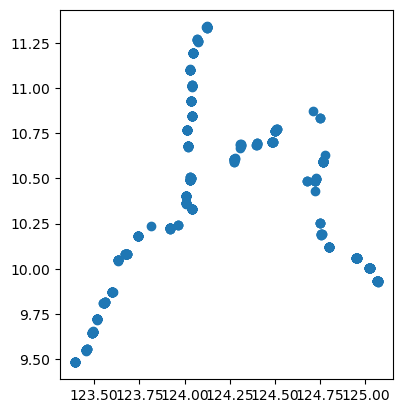

In [5]:
at_meta.plot()

In [6]:
site_geo = gpd.read_file('/hb/home/jbos/AllenCoralAtlas/Geomorphic-Map/geomorphic.shp')

In [7]:
site_geo

,class,geometry
0,Deep Lagoon,"POLYGON ((123.20448 9.47444, 123.20457 9.47444..."
1,Terrestrial Reef Flat,"POLYGON ((123.45192 9.54721, 123.45201 9.54721..."
2,Back Reef Slope,"POLYGON ((123.15831 9.54945, 123.15844 9.54945..."
3,Inner Reef Flat,"POLYGON ((123.45426 9.55174, 123.4543 9.55174,..."
4,Outer Reef Flat,"POLYGON ((123.15714 9.55156, 123.15718 9.55156..."
...,...,...
63938,Plateau,"POLYGON ((124.14394 10.15123, 124.1443 10.1512..."
63939,Terrestrial Reef Flat,"POLYGON ((124.14349 10.14562, 124.14358 10.145..."
63940,Back Reef Slope,"POLYGON ((124.14704 10.26527, 124.14708 10.265..."
63941,Inner Reef Flat,"POLYGON ((124.16846 10.15828, 124.16887 10.158..."


In [8]:
at_meta.crs = site_geo.crs

In [9]:
atenuis_geo = pd.DataFrame(gpd.sjoin(at_meta,site_geo,how='inner',predicate='within'))

In [10]:
atenuis_geo['class'].value_counts()

class
Sheltered Reef Slope     309
Deep Lagoon               63
Terrestrial Reef Flat     51
Outer Reef Flat           36
Back Reef Slope           25
Shallow Lagoon            20
Reef Crest                17
Plateau                   13
Patch Reefs               12
Inner Reef Flat            8
Name: count, dtype: int64

In [11]:
inds1 = pd.read_csv('taxa1_inds.csv')
inds1['taxon'] = 1
inds2 = pd.read_csv('taxa2_inds.csv')
inds2['taxon'] = 2
inds3 = pd.read_csv('taxa3_inds.csv')
inds3['taxon'] = 3 
inds4 = pd.read_csv('taxa4_inds.csv')
inds4['taxon'] = 4

In [12]:
dict1 = dict(zip(inds1['x'].to_list(), inds1['taxon'].to_list()))
dict2 = dict(zip(inds2['x'].to_list(), inds2['taxon'].to_list()))
dict3 = dict(zip(inds3['x'].to_list(), inds3['taxon'].to_list()))
dict4 = dict(zip(inds4['x'].to_list(), inds4['taxon'].to_list()))

In [13]:
taxa_dict = dict1 | dict2 | dict3 | dict4

In [14]:
atenuis_geo['taxon'] = atenuis_geo['Sample_ID'].map(taxa_dict)

In [15]:
atenuis = atenuis_geo.loc[atenuis_geo['taxon']>0]

In [16]:
atenuis['class'] = atenuis['class'].astype('category')

/tmp/ipykernel_3592124/1832783131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atenuis['class'] = atenuis['class'].astype('category')


In [60]:
atenuis

,Unnamed: 0.1,Unnamed: 0,Sample_ID,Time,Day,Month,Year,Depth_ft,Unnamed: 6,Unnamed: 7,...,name,DisplayColor,Distance,ele,time,SHOREDIST,COORDS,index_right,class,taxon
2,2,2,CEB15_T03,14:07,20,1,2016,NaN,NaN,NOT SURE,...,A016-01-20 16:06:54,Cyan,753.0,8.79,2016-01-20T06:26:25Z,809.449402,POINT (123.9637 10.24501),53533,Reef Crest,4.0
3,3,3,CEB16_T01,13:06,22,1,2016,10.0,NaN,NaN,...,2016-01-22 14:14:13,Cyan,1988.0,7.83,2016-01-22T05:06:04Z,2560.348389,POINT (123.91664 10.22341),39548,Reef Crest,3.0
4,4,4,CEB16_T02,13:11,22,1,2016,NaN,NaN,NaN,...,2016-01-22 14:14:13,Cyan,1988.0,7.83,2016-01-22T05:11:04Z,2560.348389,POINT (123.91666 10.22338),39548,Reef Crest,1.0
9,9,9,CEB16_T07,13:43,22,1,2016,NaN,NaN,NaN,...,2016-01-22 14:14:13,Cyan,1988.0,6.39,2016-01-22T05:43:01Z,2560.348389,POINT (123.91682 10.22332),39548,Reef Crest,3.0
11,11,11,CEB16_T09,13:51,22,1,2016,NaN,NaN,NaN,...,2016-01-22 14:14:13,Cyan,1988.0,5.42,2016-01-22T05:51:09Z,2560.348389,POINT (123.91682 10.2234),39548,Reef Crest,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629,629,629,CEB33_T10,10:29,23,4,2016,24.0,NaN,NaN,...,2016-04-23 10:42:36,Cyan,7578.0,16.96,2016-04-23T02:29:02Z,156.066910,POINT (124.48456 10.70027),40871,Sheltered Reef Slope,1.0
631,631,631,CEB33_T12,11:25,23,4,2016,NaN,NaN,NaN,...,2016-04-23 12:07:42,Cyan,459.0,14.56,2016-04-23T03:24:53Z,111.319489,POINT (124.48387 10.70031),40871,Sheltered Reef Slope,2.0
635,635,635,CEB33_T16,11:40,23,4,2016,NaN,NaN,NaN,...,2016-04-23 12:07:42,Cyan,459.0,14.08,2016-04-23T03:40:06Z,111.319489,POINT (124.48332 10.70075),39118,Sheltered Reef Slope,1.0
640,640,640,CEB32_T01,9:09,24,4,2016,11.0,NaN,NaN,...,2016-04-24 10:05:57,Cyan,813.0,9.75,2016-04-24T01:09:05Z,396.555634,POINT (124.4027 10.69485),49878,Deep Lagoon,1.0


In [17]:
at_1 = atenuis.loc[atenuis['taxon']==1]
at_2 = atenuis.loc[atenuis['taxon']==2]
at_3 = atenuis.loc[atenuis['taxon']==3]
at_4 = atenuis.loc[atenuis['taxon']==4]

In [18]:
class_probabilities = atenuis['class'].value_counts() / atenuis['class'].value_counts().sum()

In [19]:
scipy.stats.chisquare(at_1['class'].value_counts(),len(at_1)*class_probabilities)

Power_divergenceResult(statistic=np.float64(2.680947028693461), pvalue=np.float64(0.952758821696476))

In [20]:
scipy.stats.chisquare(at_2['class'].value_counts(),len(at_2)*class_probabilities)

Power_divergenceResult(statistic=np.float64(2.0775709697368687), pvalue=np.float64(0.978540971868807))

In [21]:
scipy.stats.chisquare(at_3['class'].value_counts(),len(at_3)*class_probabilities)

Power_divergenceResult(statistic=np.float64(1.6395305553523685), pvalue=np.float64(0.9901415505539997))

In [22]:
scipy.stats.chisquare(at_4['class'].value_counts(),len(at_4)*class_probabilities)

Power_divergenceResult(statistic=np.float64(2.11058511381092), pvalue=np.float64(0.9774325941417148))

In [23]:
at_1['class'].value_counts()

class
Sheltered Reef Slope     46
Deep Lagoon              12
Terrestrial Reef Flat     9
Back Reef Slope           6
Outer Reef Flat           3
Shallow Lagoon            3
Reef Crest                2
Patch Reefs               1
Plateau                   0
Name: count, dtype: int64

In [24]:
rclass_col = {'Terrestrial Reef Flat':'pink','Shallow Lagoon':'dodgerblue','Deep Lagoon':'mediumblue','Back Reef Slope':'c','Inner Reef Flat':'orchid','Outer Reef Flat':'mediumpurple','Reef Crest':'purple','Sheltered Reef Slope':'limegreen','Reef Slope':'seagreen','Plateau':'darkorange','Patch Reefs':'Navy'}

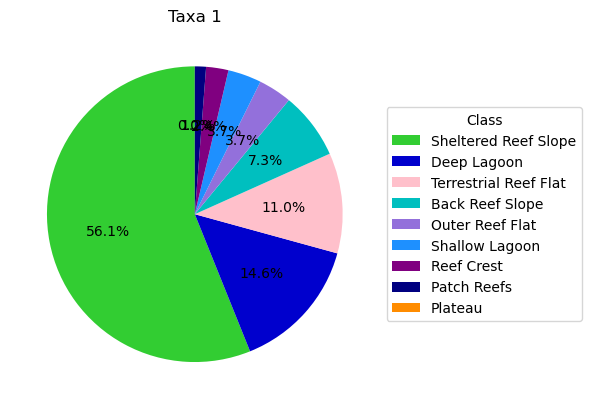

In [36]:
values = at_1['class'].value_counts()
labels = values.index
colors = [rclass_col[label] for label in labels]

# Create the pie chart without labels
plt.pie(values, startangle=90, colors=colors, autopct='%1.1f%%')

# Add a legend
plt.legend(labels, title="Class", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Taxa 1")
# Show the plot
plt.show()

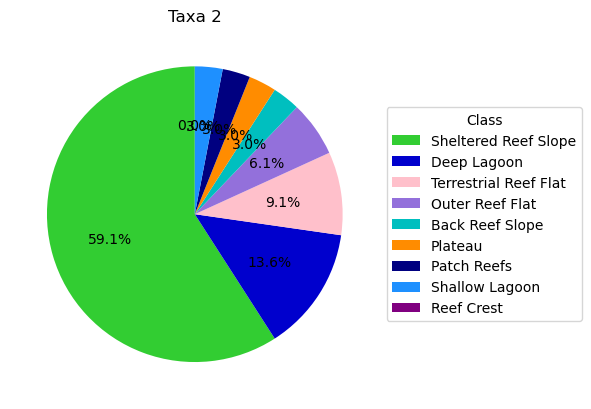

In [37]:
values = at_2['class'].value_counts()
labels = values.index
colors = [rclass_col[label] for label in labels]

# Create the pie chart without labels
plt.pie(values, startangle=90, colors=colors, autopct='%1.1f%%')

# Add a legend
plt.legend(labels, title="Class", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Taxa 2")
# Show the plot
plt.show()

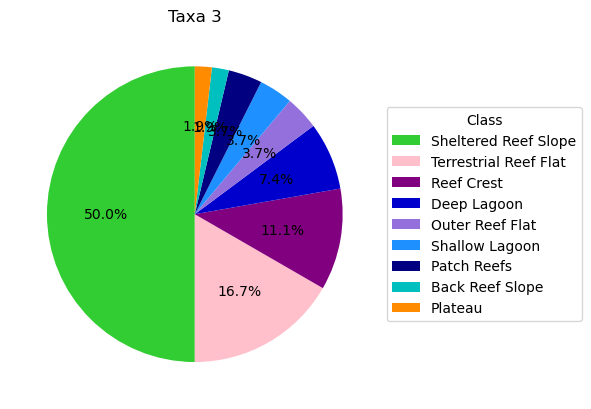

In [38]:
values = at_3['class'].value_counts()
labels = values.index
colors = [rclass_col[label] for label in labels]

# Create the pie chart without labels
plt.pie(values, startangle=90, colors=colors, autopct='%1.1f%%')

# Add a legend
plt.legend(labels, title="Class", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Taxa 3")
# Show the plot
plt.show()

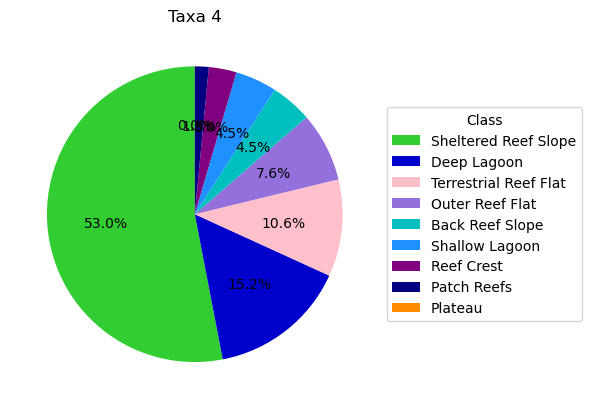

In [39]:
values = at_4['class'].value_counts()
labels = values.index
colors = [rclass_col[label] for label in labels]

# Create the pie chart without labels
plt.pie(values, startangle=90, colors=colors, autopct='%1.1f%%')

# Add a legend
plt.legend(labels, title="Class", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Taxa 4")
# Show the plot
plt.show()

In [51]:
at_4

,Unnamed: 0,Sample_ID,Time,Day,Month,Year,Depth_ft,Unnamed: 6,Unnamed: 7,hour,...,lon,name,DisplayColor,Distance,ele,time,COORDS,index_right,class,taxon
2,2,CEB15_T03,14:07,20,1,2016,NaN,NaN,NOT SURE,14,...,123.963700,A016-01-20 16:06:54,Cyan,753.0,8.79,2016-01-20T06:26:25Z,POINT (123.9637 10.24501),53533,Reef Crest,4.0
18,18,CEB16_T16,14:58,22,1,2016,NaN,NaN,NaN,14,...,123.919890,2016-01-22 15:45:00,Cyan,695.0,6.87,2016-01-22T06:57:56Z,POINT (123.91989 10.22359),12224,Reef Crest,4.0
73,73,CEB27_T01,12:46,3,2,2016,NaN,NaN,NaN,12,...,123.393612,2016-02-03 14:32:15,Cyan,1413.0,10.71,2016-02-03T04:45:58Z,POINT (123.39361 9.48468),59076,Sheltered Reef Slope,4.0
74,74,CEB27_T02,13:26,3,2,2016,NaN,NaN,NaN,13,...,123.393878,2016-02-03 14:32:15,Cyan,1413.0,6.87,2016-02-03T05:26:01Z,POINT (123.39388 9.48454),59076,Sheltered Reef Slope,4.0
76,76,CEB27_T04,13:39,3,2,2016,NaN,NaN,NaN,13,...,123.393873,2016-02-03 14:32:15,Cyan,1413.0,6.39,2016-02-03T05:38:55Z,POINT (123.39387 9.48487),59076,Sheltered Reef Slope,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,589,CEB29_T09,14:42,20,4,2016,NaN,NaN,NaN,14,...,124.275461,2016-04-20 15:58:08,Cyan,1002.0,7.35,2016-04-20T06:42:06Z,POINT (124.27546 10.60721),6251,Sheltered Reef Slope,4.0
601,601,CEB35_T02,10:20,22,4,2016,10.0,NaN,NaN,10,...,124.510376,2016-04-22 11:19:16,Cyan,868.0,14.56,2016-04-22T02:20:10Z,POINT (124.51038 10.77389),210,Sheltered Reef Slope,4.0
613,613,CEB35_T14,13:37,22,4,2016,NaN,NaN,NaN,13,...,124.501218,2016-04-22 13:50:20,Cyan,1402.0,15.52,2016-04-22T05:37:00Z,POINT (124.50122 10.76399),45132,Sheltered Reef Slope,4.0
614,614,CEB35_T15,13:48,22,4,2016,NaN,NaN,NaN,13,...,124.501755,2016-04-22 13:50:20,Cyan,1402.0,13.12,2016-04-22T05:48:07Z,POINT (124.50176 10.76365),45132,Sheltered Reef Slope,4.0


In [25]:
at_depth = metadat.loc[metadat['Depth_ft']>0]

In [26]:
at_depth['taxon'] = at_depth['Sample_ID'].map(taxa_dict)

/tmp/ipykernel_3592124/2237106495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_depth['taxon'] = at_depth['Sample_ID'].map(taxa_dict)


In [27]:
at_depth = at_depth.loc[at_depth['taxon']>0]

In [28]:
at_depth.loc[at_depth['taxon']==1]['Depth_ft'].median()

np.float64(13.0)

In [29]:
at_depth.loc[at_depth['taxon']==2]['Depth_ft'].median()

np.float64(12.0)

In [30]:
at_depth.loc[at_depth['taxon']==3]['Depth_ft'].median()

np.float64(10.0)

In [31]:
at_depth.loc[at_depth['taxon']==4]['Depth_ft'].median()

np.float64(11.5)

In [32]:
tax = at_depth['taxon'].unique()
depths = [at_depth[at_depth['taxon']==tax[i]]['Depth_ft'] for i in range(len(tax))]
scipy.stats.kruskal(*depths)

KruskalResult(statistic=np.float64(5.883014838528258), pvalue=np.float64(0.11744261486404092))

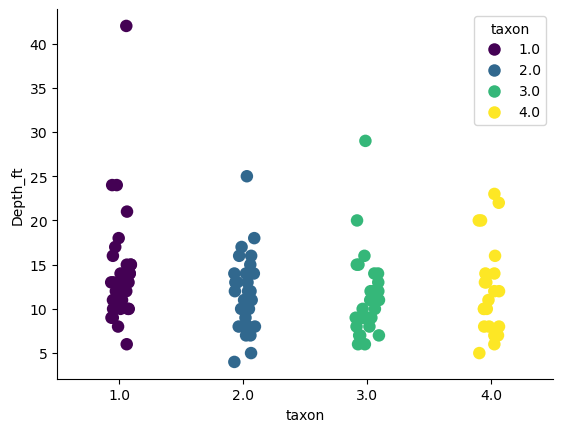

In [51]:
plot_colors = ["#440154FF", "#31688EFF", "#35B779FF", "#FDE725FF"]
strip = sns.stripplot(y='Depth_ft', x='taxon', data=at_depth, dodge=False, zorder=0.5, s=9, hue='taxon',palette=plot_colors)
sns.despine(top=True, right=True)
plt.savefig("cryptic_taxa_depth.png",dpi=1200)
plt.show()

In [35]:
at_shore = metadat.loc[metadat['SHOREDIST']>0]

In [36]:
at_shore['taxon'] = at_shore['Sample_ID'].map(taxa_dict)

/tmp/ipykernel_3592124/2450659145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_shore['taxon'] = at_shore['Sample_ID'].map(taxa_dict)


In [37]:
at_shore = at_shore.loc[at_shore['taxon']>0]

In [38]:
at_shore.loc[at_shore['taxon']==1]['SHOREDIST'].mean()

np.float64(5344.871153945923)

In [39]:
at_shore.loc[at_shore['taxon']==2]['SHOREDIST'].mean()

np.float64(3430.8680831666975)

In [40]:
at_shore.loc[at_shore['taxon']==3]['SHOREDIST'].mean()

np.float64(2429.7598738493743)

In [41]:
at_shore.loc[at_shore['taxon']==4]['SHOREDIST'].mean()

np.float64(1873.6488317251205)

In [59]:
at_shore

,Unnamed: 0.1,Unnamed: 0,Sample_ID,Time,Day,Month,Year,Depth_ft,Unnamed: 6,Unnamed: 7,...,lat,lon,name,DisplayColor,Distance,ele,time,SHOREDIST,COORDS,taxon
2,2,2,CEB15_T03,14:07,20,1,2016,NaN,NaN,NOT SURE,...,10.245011,123.963700,A016-01-20 16:06:54,Cyan,753.0,8.79,2016-01-20T06:26:25Z,809.449402,POINT (123.9636996388 10.2450106479),4.0
3,3,3,CEB16_T01,13:06,22,1,2016,10.0,NaN,NaN,...,10.223413,123.916636,2016-01-22 14:14:13,Cyan,1988.0,7.83,2016-01-22T05:06:04Z,2560.348389,POINT (123.9166356716 10.2234126627),3.0
4,4,4,CEB16_T02,13:11,22,1,2016,NaN,NaN,NaN,...,10.223384,123.916660,2016-01-22 14:14:13,Cyan,1988.0,7.83,2016-01-22T05:11:04Z,2560.348389,POINT (123.9166603144 10.2233844995),1.0
9,9,9,CEB16_T07,13:43,22,1,2016,NaN,NaN,NaN,...,10.223325,123.916817,2016-01-22 14:14:13,Cyan,1988.0,6.39,2016-01-22T05:43:01Z,2560.348389,POINT (123.9168172237 10.2233248204),3.0
11,11,11,CEB16_T09,13:51,22,1,2016,NaN,NaN,NaN,...,10.223405,123.916823,2016-01-22 14:14:13,Cyan,1988.0,5.42,2016-01-22T05:51:09Z,2560.348389,POINT (123.9168230072 10.2234045323),1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,632,632,CEB33_T13,11:28,23,4,2016,NaN,NaN,NaN,...,10.700486,124.483695,2016-04-23 12:07:42,Cyan,459.0,13.12,2016-04-23T03:28:00Z,111.319489,POINT (124.4836948905 10.7004858647),1.0
633,633,633,CEB33_T14,11:32,23,4,2016,NaN,NaN,NaN,...,10.700592,124.483648,2016-04-23 12:07:42,Cyan,459.0,13.12,2016-04-23T03:31:53Z,111.319489,POINT (124.483647868 10.7005924825),1.0
635,635,635,CEB33_T16,11:40,23,4,2016,NaN,NaN,NaN,...,10.700749,124.483322,2016-04-23 12:07:42,Cyan,459.0,14.08,2016-04-23T03:40:06Z,111.319489,POINT (124.4833223987 10.7007492241),1.0
640,640,640,CEB32_T01,9:09,24,4,2016,11.0,NaN,NaN,...,10.694845,124.402702,2016-04-24 10:05:57,Cyan,813.0,9.75,2016-04-24T01:09:05Z,396.555634,POINT (124.4027023204 10.6948451791),1.0


In [42]:
tax = at_shore['taxon'].unique()
dists = [at_shore[at_shore['taxon']==tax[i]]['SHOREDIST'] for i in range(len(tax))]
scipy.stats.kruskal(*dists)

KruskalResult(statistic=np.float64(3.876094068532226), pvalue=np.float64(0.2751583172255458))

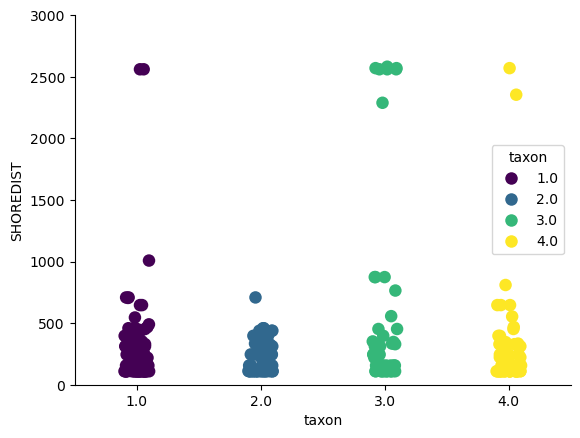

In [49]:
plot_colors = ["#440154FF", "#31688EFF", "#35B779FF", "#FDE725FF"]
strip = sns.stripplot(y='SHOREDIST', x='taxon', data=at_shore, dodge=False, zorder=0.5, s=9, hue='taxon',palette=plot_colors)
sns.despine(top=True, right=True)
plt.ylim(0,3000)
plt.savefig("cryptic_taxa_shoredist.png",dpi=1200)
plt.show()